# Interactive Visualization

This ipython notebook explains our interactive visualization pipeline. In particular, we will be documenting here:

    1) How we achieved the Tree graphs for the word Frequency
    2) The Timeline graph

# The Tree Graph For Word Frequency

This was achieved using D3JS. First we import the preprocessed data that have been generated from cleaning and preprocessing  pipeline. Then we filter them to extract at least the 10 or 15 most freqquent most frequent data

In [1]:
import pandas as pd

### Import CSV word count document

In [97]:
frameData = pd.read_csv("wordCountYear_Clean_v3.csv" )

In [98]:
frameData[0:1]

,Unnamed: 0,Unnamed: 1,a,aar,aarau,aax,aay,abandonné,abattu,abb,...,évéque,évêque,êles,êlre,êtr,îes,île,œil,œuvre,œx
0,1798-02-01,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0


### Reprocess the imported Data set 

We change "Unnamed 0" column to "TimeLine". We set  the index  as the  "TimeLine" column and also set the name of the index to "TimeLine". The aim is we want to break the index into "batches of time frame" and from each "time frame" we extract the most occuring/frequent.

In [99]:
frameData=frameData.rename(columns = {'Unnamed: 0':'TimeLine'})  # rename "Unnamed 0" column

In [100]:
frameData=frameData.set_index(["TimeLine"]) # set index as TimeLine

In [101]:
frameData.index.name="TimeLine" #change index name to TimeLine

In [105]:
frameData[0:1] #check the changes have been effected

,Unnamed: 1,a,aar,aarau,aax,aay,abandonné,abattu,abb,abbaye,...,évéque,évêque,êles,êlre,êtr,îes,île,œil,œuvre,œx
TimeLine,,,,,,,,,,,,,,,,,,,,,
1798-02-01,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0


### Export Most Occuring Words as JSON file

We follow the procedure below:

    (1) We divide the data into batches
    (2) For each batch we calculate the mean occurence for each word
    (3) We select a threshold (100) and filter out words with occurence less than the threshold
    (4) We save this as JSON file. 
    (5) The name of the file should end with the first index in the batch (this is a date in the TimeLine index)
    

In [121]:
frameDatas = frameData[0:40] # we illustrate with this sample data. In our implementation we did for the whole data

In [126]:
#This divides the data frame into batches, calculate the mean along the row. The words with the values grater than 
# threshold we want will be stored as JSON and this represent the highest occuring for the Batchsize.

UpperLimit = 10;  # upper limit of block size when we use iloc---> as in frameDatas.iloc[:UpperLimit]
BatchSize = 10;   # collect the rows in batches of 10
LowerLimit =0     # Lower limit of block size when we use iloc -----> as in frameDatas.iloc[:UpperLimit]
Threshold = 100;  # Threshold Values. ----> as  tempStore[tempStore.values>Threshold]
StepSize =10;     # Divide the column index size by the batch size 
IterationRange = int((frameDatas.index.size)/StepSize); # this will determine the range of iteration
                                                        # --->  as in   Dataframes.index.size/StepSize

for _ in range(IterationRange):
    tempStores = frameDatas.iloc[LowerLimit:UpperLimit]
    tempStore = tempStores.mean(axis=0)  
    tempStore = tempStore[tempStore.values>Threshold]
    JsonFileNameSequence = tempStores.index[0];
    tempStore.to_json("tempStore" + str(JsonFileNameSequence)+ ".json") 
    LowerLimit = UpperLimit; 
    UpperLimit = UpperLimit + BatchSize;

### Format the JSON File

In formatting the JSON file we have used the Sublime editors. We used the packages "JSON ReIndent" and "Pretty JSON" to format the data set. In particular we have to indicate the parent node and children node before parsing into D3JS. We found that holding the "ALT" key and doing column selection helps with this. The "CTRL + CMD + P" helps witht the reformatting

Doing this we end up with the following:

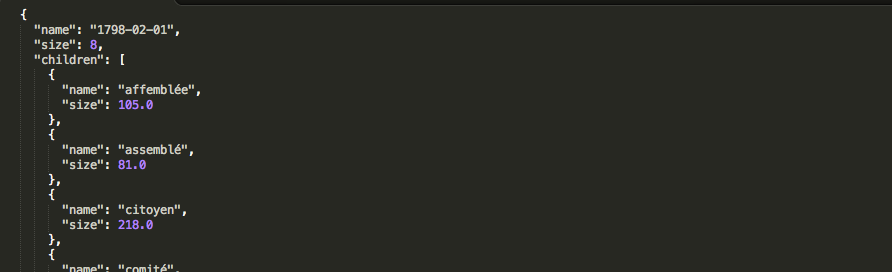

In [128]:
from IPython.display import Image
Image(filename='tree.png') 

### From JSON File to D3JS

Here we parse the data set that we prepared to the D3JS pipeline. Basically, we have an HTML file and make the  source of our script be  D3JS like this  [d3js.org/d3.v3.min.js](url_here) . From here we set the layout parameters and specify the links and nodes. We also define the SVG, which is like the canvas on which we define our interactive display ; this holds the layout. Lastly we define a couple of functions that respods to clicks. With this we should get the image shown below.

In summary one can click on the date nodes to go along the time axis and look at the evolution of the most frequent words over time.

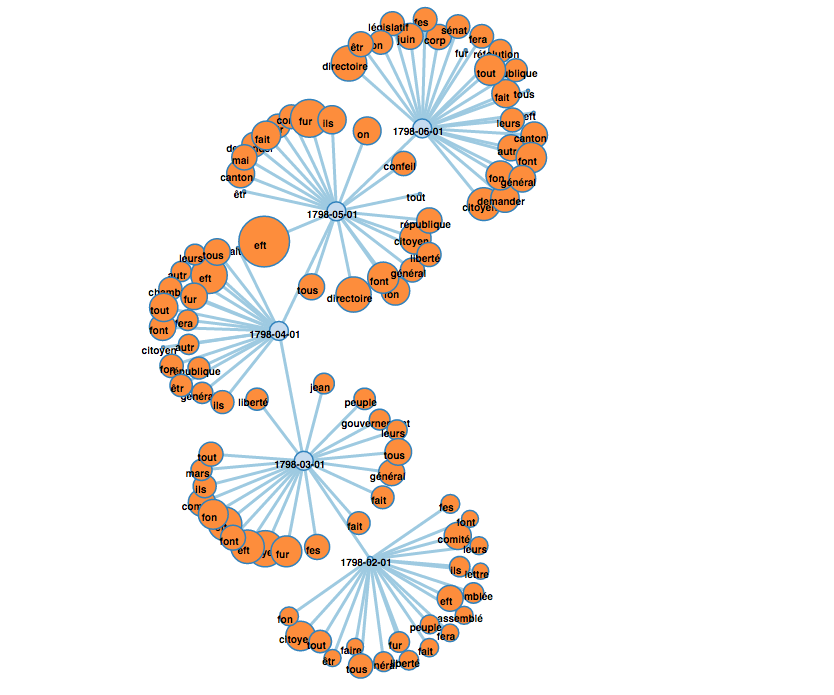

In [129]:
Image(filename='words_graph.png') 

# The Timeline graph

The time line graph shows the 14 most frequent words from 1798 to 1998. We want to plot the evolution of the rank of a word over time.

The work pipeline is same as the previous. But in this case we have seperate:
    
    (1) JSON file
    (2) Java script file (that uses the data in JSON file)
    (2) HTML file thats loads the script 
    (3) CSS file 
 We also used a different .csv file that bears the ranking from the cleaning and preprocessing timeline (documented in the project file).   

we load the file and convert to JSON:


In [130]:
DataRank = pd.read_csv("wordSelect_Rank.csv" )

In [132]:
DataRank[0:3]

,Unnamed: 0,1812-01-01,1813-01-01,1814-01-01,1815-01-01,1816-01-01,1817-01-01,1818-01-01,1819-01-01,1820-01-01,...,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01
0,autre,11,9,11,11,11,14,11,11,11,...,13,13,13,13,13,13,13,13,13,13
1,conseil,1,2,6,4,6,3,3,2,3,...,8,8,8,7,7,7,6,7,7,6
2,contre,7,6,4,5,4,5,6,9,9,...,11,11,11,11,10,9,8,8,8,8


Each row shows the sequential  ranking of each word from 1812 to 1998 from the set of the 14 most frequent words.

### JSON File pipe line

We export this as JSON file and re adjust the format to our implementation. In particular each word has a placing value and the corresponding year.

In [133]:
DataRank.to_json("wordrank.json") 

After exporting we use Sublime text to readjust the format as explained earlier and obtain something like this:

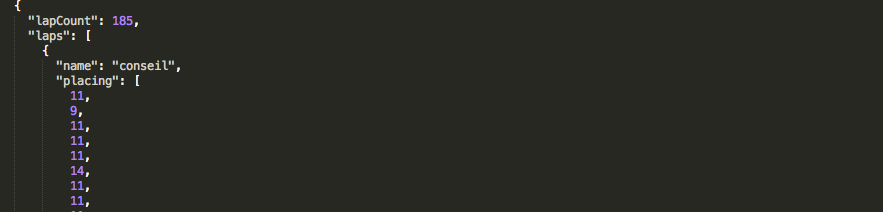

In [136]:
Image(filename='wordrank.png') 

### D3JS pipeline

This is the most complicated aspect. In particular we have to listen to clicks and also capture toggle zoom. Details of which is in the project files. This was adapted from the work of Chris Pudney under MIT License http://www.vislives.com/2012/03/d3-lap-charts.html. Questions regarding the modifications we made can be forwarded to lukman.olagoke@epfl.ch.

We here provide a screen short of it.

With this interactive vizualization we can do the following things:

1. Select one word and view the evolution of it's rank over timne
2. Zomm in one sub part of the timeline (here on 1814-186)
3. Unzoom and look at the whole timeline

With this visualization we can play around to see how the most frequent words evolve over time!

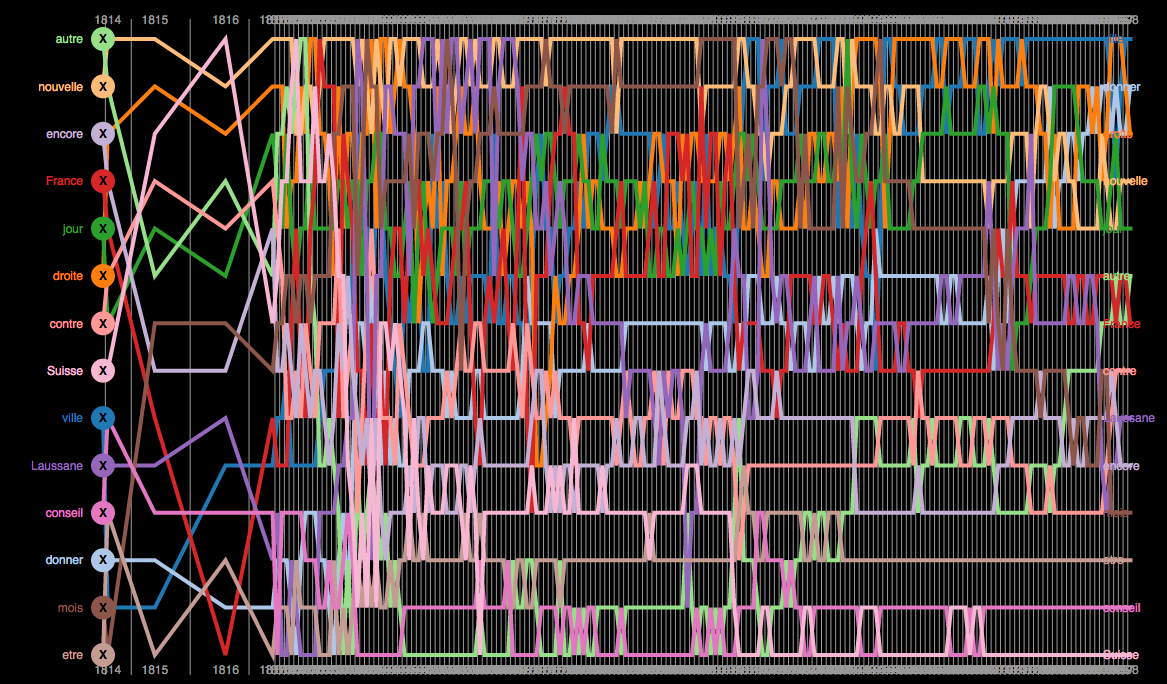

In [139]:
Image(filename='word_rank.png') 

Time line of the rank of the word "nouvelle" illustrated:

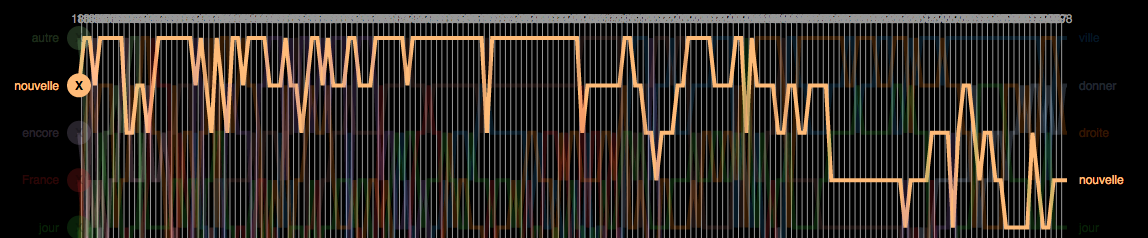

In [140]:
Image(filename='wordtimeline.png') 